In [106]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

from nltk.tokenize import  word_tokenize 
from nltk.corpus import stopwords
import string

df = pd.read_csv('books.csv')
df_title = df.title

In [89]:
df.head()


,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,summary,Unnamed: 11
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,The war against Voldemort is not going well; e...,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,There is a door at the end of a silent corrido...,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,The Dursleys were so mean and hideous that sum...,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Harry Potter's third year at Hogwarts is full ...,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,Through the magic of print-on-demand technolog...,NaN


In [126]:
nltk.download('stopwords') # if necessary...

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anmol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [127]:
def listToString(s): 
    string = "" 
    for ele in s: 
        string += ele+" "
    
    # return string  
    return string

In [151]:
#Making text corpus
text = []
for ele in df.summary:
    text.append(ele)
    

In [152]:
#Preprocessing the text data
sentences = []
word_set = []
stop = set(stopwords.words('english') + list(string.punctuation))

 
for sent in text:
    x = [i.lower() for  i in word_tokenize(sent) if i.isalpha()] #stop]
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)
 
#Set of vocab 
word_set = set(word_set)
#Total documents in our corpus
total_documents = len(sentences)
 
#Creating an index for each word in our vocab.
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1

In [153]:
#Create a count dictionary
 
def count_dict(sentences):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count
 
word_count = count_dict(sentences)

In [154]:
#Term Frequency
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    return occurance/N

In [155]:
#Inverse Document Frequency
 
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)


In [156]:
def tf_idf(sentence):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
        tf = termfreq(sentence,word)
        idf = inverse_doc_freq(word)
         
        value = tf*idf
        tf_idf_vec[index_dict[word]] = value 
    return tf_idf_vec

In [157]:
#TF-IDF Encoded text corpus
vectors = []
for sent in sentences:
    vec = tf_idf(sent)
    vectors.append(vec)
 


In [159]:
print(len(vectors[1]))

16412


# NAME OF THE BOOK from the csv

In [160]:
cosines = []

A = vectors[0]
for ele in vectors:
    cosine = np.dot(A,ele)/(norm(A)*norm(ele))
    cosines.append(cosine)

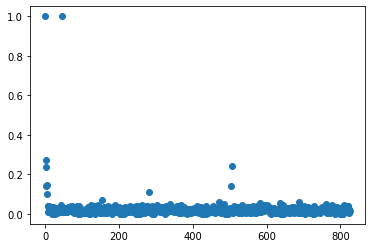

In [161]:
x = list(range(0, len(df)))
y = cosines

plt.scatter(x, y)
plt.show()

In [162]:
x = sorted(range(len(cosines)), key=lambda i: cosines[i])[-10:] # For top 10

for i in x:
    print(df_title[i] + "    :   " + str(cosines[i]))
    

Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)    :   0.1023448097325231
No Price Too High: A Pentecostal Preacher Becomes Catholic - The Inspirational Story of Alex Jones as Told to Diane Hanson    :   0.11185854788608111
Three Plays: The Wasps / The Poet and the Women / The Frogs    :   0.14050995176507347
Harry Potter and the Order of the Phoenix (Harry Potter  #5)    :   0.14183999935761288
Unauthorized Harry Potter Book Seven News: "Half-Blood Prince" Analysis and Speculation    :   0.1445784267246444
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)    :   0.23755408593536698
Frogs/Assemblywomen/Wealth (Loeb Classical Library 180)    :   0.24229849853691215
Harry Potter and the Chamber of Secrets (Harry Potter  #2)    :   0.27336024427907313
Harry Potter and the Half-Blood Prince (Harry Potter  #6)    :   1.0000000000000002
Uncommon Carriers    :   1.0000000000000002
